In [2]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal['INR', 'EUR']  
    total: float

In [4]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    """
    Calculate the total amount in USD and INR.
    """
    state['total_usd'] = state['amount_usd'] * 1.8  # Assuming 1 USD = 1 USD
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    """
    Convert the total amount in USD to INR.
    """
    state['total'] = state['total_usd'] * 85  # Assuming 1 USD = 85 INR
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    """
    Convert the total amount in USD to INR.
    """
    state['total'] = state['total_usd'] * 0.9  # Assuming 1 USD = 85 INR
    return state

def choose_conversion(state: PortfolioState) -> str:
    return state['target_currency']

In [14]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_usd_node", calc_total_usd)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_usd_node")
builder.add_conditional_edges(
    "calc_total_usd_node", 
    choose_conversion,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node",
        # otherwise: END  # Handle unexpected values
    }
)
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

graph = builder.compile()

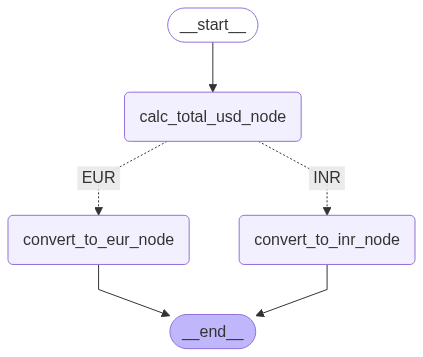

In [6]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"amount_usd": 1000, "target_currency": "EUR"})

{'amount_usd': 1000,
 'total_usd': 1800.0,
 'target_currency': 'EUR',
 'total': 1620.0}